<a href="https://colab.research.google.com/github/KaylumCassidy/CA/blob/main/FoodCloudCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Cloud Round 2

## Loading Data

In [1]:
import pandas as pd

# Load the data
categories_df = pd.read_csv('categories (2).csv')
customers_df = pd.read_csv('customers (2).csv')
sales_df = pd.read_csv('sales (2).csv')
vendors_df = pd.read_csv('vendors (2).csv')

# Preview each DataFrame to understand the structure and check for missing values
dataframes = {
    "Categories": categories_df,
    "Customers": customers_df,
    "Sales": sales_df,
    "Vendors": vendors_df
}

for name, df in dataframes.items():
    print(f"{name} DataFrame Preview:")
    display(df.head())
    print(f"\n{name} Missing Data Summary:")
    display(df.isnull().sum())
    print("\n---\n")


Categories DataFrame Preview:


,id,category_system_id,Level3,Level2,Level1
0,0,5dab608b-c873-ec11-bf26-000d3a295fd3,1.0,1.0,1.0
1,1,78ab608b-c873-ec11-bf26-000d3a295fd3,2.0,1.0,1.0
2,2,79ab608b-c873-ec11-bf26-000d3a295fd3,3.0,1.0,1.0
3,3,7aab608b-c873-ec11-bf26-000d3a295fd3,4.0,1.0,1.0
4,4,7bab608b-c873-ec11-bf26-000d3a295fd3,5.0,1.0,1.0



Categories Missing Data Summary:


id                       0
category_system_id    1204
Level3                   1
Level2                   1
Level1                   1
dtype: int64


---

Customers DataFrame Preview:


,customer_id,customer_index,customer_latitude,customer_logitude,customer_status,customer_membership,customer_preferred_categories,city,state,country
0,0,6.0,NaN,NaN,Inactive,Not Confirmed,"Bread, Condiments, Confectionery, Cooking Sauc...",NaN,NaN,NaN
1,1,7.0,NaN,NaN,Inactive,Not Confirmed,"Bread, Breakfast, Condiments, Confectionery, C...",NaN,NaN,NaN
2,2,8.0,51.893792,-8.473308,Active,Ad-hoc,"Condiments, Confectionery, Cooking Sauce, Frui...",NaN,NaN,IE
3,3,9.0,NaN,NaN,Inactive,Not Confirmed,"Bread, Condiments, Confectionery, Cooking Sauc...",NaN,NaN,NaN
4,4,10.0,NaN,NaN,Inactive,Not Confirmed,NaN,NaN,NaN,NaN



Customers Missing Data Summary:


customer_id                          0
customer_index                   17494
customer_latitude                18653
customer_logitude                18653
customer_status                  17494
customer_membership              18058
customer_preferred_categories    19444
city                             19654
state                            19655
country                          19222
dtype: int64


---

Sales DataFrame Preview:


,transaction_id,Date,category_id,vendor_id,customer_id,sales
0,D1955C1A-F769-4958-85EC-0381FCA86724,16/01/2024,846,440,946,13.0
1,0B03CF45-B0FA-4E02-98BE-F054FB5F7A49,15/01/2024,846,440,946,6.5
2,F6F5C296-87FD-4825-AF1C-2A7134D34A6B,20/02/2024,846,440,946,6.5
3,2B44F231-604F-4B82-89F7-A946D160B227,17/02/2024,846,758,999,6.5
4,4A32E99A-03F7-441A-94DC-EE5C302DA4DE,03/02/2024,846,758,999,6.5



Sales Missing Data Summary:


transaction_id    0
Date              0
category_id       0
vendor_id         0
customer_id       0
sales             0
dtype: int64


---

Vendors DataFrame Preview:


,id,county,status,country,current_status
0,431,Dublin,Active,NaN,Activated
1,432,Louth,Active,NaN,Activated
2,433,Kilkenny,Active,NaN,Activated
3,434,Laois,Active,NaN,Activated
4,435,Limerick,Active,NaN,Activated



Vendors Missing Data Summary:


id                 0
county             3
status             3
country           18
current_status     0
dtype: int64


---



In [2]:
# Display the column names for each DataFrame
column_names = {name: df.columns.tolist() for name, df in dataframes.items()}
column_names


{'Categories': ['id', 'category_system_id', 'Level3', 'Level2', 'Level1'],
 'Customers': ['customer_id',
  'customer_index',
  'customer_latitude',
  'customer_logitude',
  'customer_status',
  'customer_membership',
  'customer_preferred_categories',
  'city',
  'state',
  'country'],
 'Sales': ['transaction_id',
  'Date',
  'category_id',
  'vendor_id',
  'customer_id',
  'sales'],
 'Vendors': ['id', 'county', 'status', 'country', 'current_status']}

## Merge Data

In [6]:
# Merging sales data with customers, vendors, and categories dataframes
merged_df = sales_df.merge(customers_df, on='customer_id', how='left')\
                    .merge(vendors_df, left_on='vendor_id', right_on='id', how='left')\
                    .merge(categories_df, left_on='category_id', right_on='id', how='left')

# Display the first few rows of the merged dataframe
merged_df.head()


,transaction_id,Date,category_id,vendor_id,customer_id,sales,customer_index,customer_latitude,customer_logitude,customer_status,...,id_x,county,status,country_y,current_status,id_y,category_system_id,Level3,Level2,Level1
0,D1955C1A-F769-4958-85EC-0381FCA86724,16/01/2024,846,440,946,13.0,955.0,52.267907,-9.705572,Active,...,440,Kerry,Active,NaN,Activated,846,NaN,843.0,108.0,36.0
1,0B03CF45-B0FA-4E02-98BE-F054FB5F7A49,15/01/2024,846,440,946,6.5,955.0,52.267907,-9.705572,Active,...,440,Kerry,Active,NaN,Activated,846,NaN,843.0,108.0,36.0
2,F6F5C296-87FD-4825-AF1C-2A7134D34A6B,20/02/2024,846,440,946,6.5,955.0,52.267907,-9.705572,Active,...,440,Kerry,Active,NaN,Activated,846,NaN,843.0,108.0,36.0
3,2B44F231-604F-4B82-89F7-A946D160B227,17/02/2024,846,758,999,6.5,1008.0,53.279411,-6.404797,Active,...,758,Dublin,Active,NaN,Activated,846,NaN,843.0,108.0,36.0
4,4A32E99A-03F7-441A-94DC-EE5C302DA4DE,03/02/2024,846,758,999,6.5,1008.0,53.279411,-6.404797,Active,...,758,Dublin,Active,NaN,Activated,846,NaN,843.0,108.0,36.0


In [7]:
# Checking for missing data in the merged DataFrame
missing_data = merged_df.isnull().sum()

missing_data

transaction_id                     0
Date                               0
category_id                        0
vendor_id                          0
customer_id                        0
sales                              0
customer_index                    11
customer_latitude                 12
customer_logitude                 12
customer_status                   11
customer_membership              107
customer_preferred_categories    510
city                             712
state                            712
country_x                        416
id_x                               0
county                             0
status                             0
country_y                        334
current_status                     0
id_y                               0
category_system_id               712
Level3                             0
Level2                             0
Level1                             0
dtype: int64

Customer Membership: With over 100 missing values, we might consider setting a default status like "Unknown".
Customer Preferred Categories and Location Details: Since these have a substantial amount of missing data, we could either drop these columns or fill them based on domain knowledge or other columns.
Vendor and Category Details: Missing country or system IDs might be filled with a placeholder like "Not Specified" or derived from other columns if patterns exis

In [9]:
# Renaming duplicate columns for clarity
merged_df.rename(columns={
    'id_x': 'vendor_id_redundant',
    'id_y': 'category_id_redundant',
    'country_y': 'vendor_country'
}, inplace=True)

# Dropping redundant columns (redundant IDs)
merged_df.drop(columns=['vendor_id_redundant', 'category_id_redundant'], inplace=True)

# Handling missing values
# Checking for the number of missing values in each column
missing_data = merged_df.isnull().sum()

# Convert 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True, errors='coerce')

missing_data, merged_df.dtypes



(transaction_id                     0
 Date                               0
 category_id                        0
 vendor_id                          0
 customer_id                        0
 sales                              0
 customer_index                    11
 customer_latitude                 12
 customer_logitude                 12
 customer_status                   11
 customer_membership                0
 customer_preferred_categories      0
 city                               0
 state                              0
 country_x                          0
 county                             0
 status                             0
 vendor_country                   334
 current_status                     0
 category_system_id               712
 Level3                             0
 Level2                             0
 Level1                             0
 dtype: int64,
 transaction_id                           object
 Date                             datetime64[ns]
 category_id 

In [10]:


# Filling missing 'customer_membership' with "Unknown"
merged_df['customer_membership'].fillna('Unknown', inplace=True)

# For 'customer_preferred_categories', 'city', 'state', and 'country_x' where a large number of values are missing,
# we'll consider filling with 'Not Specified' or dropping, depending on their importance for analysis
# Here, we fill with 'Not Specified' for demonstration
columns_to_fill = ['customer_preferred_categories', 'city', 'state', 'country_x', 'vendor_country', 'category_system_id']
for column in columns_to_fill:
    merged_df[column].fillna('Not Specified', inplace=True)

# Display the first few rows of the cleaned dataframe to ensure changes are applied
merged_df.head(), merged_df.isnull().sum()


(                         transaction_id       Date  category_id  vendor_id  \
 0  D1955C1A-F769-4958-85EC-0381FCA86724 2024-01-16          846        440   
 1  0B03CF45-B0FA-4E02-98BE-F054FB5F7A49 2024-01-15          846        440   
 2  F6F5C296-87FD-4825-AF1C-2A7134D34A6B 2024-02-20          846        440   
 3  2B44F231-604F-4B82-89F7-A946D160B227 2024-02-17          846        758   
 4  4A32E99A-03F7-441A-94DC-EE5C302DA4DE 2024-02-03          846        758   
 
    customer_id  sales  customer_index  customer_latitude  customer_logitude  \
 0          946   13.0           955.0          52.267907          -9.705572   
 1          946    6.5           955.0          52.267907          -9.705572   
 2          946    6.5           955.0          52.267907          -9.705572   
 3          999    6.5          1008.0          53.279411          -6.404797   
 4          999    6.5          1008.0          53.279411          -6.404797   
 
   customer_status  ...          state    

## EDA

### sales analysis

In [11]:
# Convert the 'Date' column in the sales data frame to datetime format
sales_df['Date'] = pd.to_datetime(sales_df['Date'], dayfirst=True)

# Add additional columns for day, week, and month to facilitate trend analysis
sales_df['Day'] = sales_df['Date'].dt.day
sales_df['Week'] = sales_df['Date'].dt.isocalendar().week
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Year'] = sales_df['Date'].dt.year

# Analyze trends over time by aggregating sales over day, week, and month
daily_sales = sales_df.groupby(['Year', 'Month', 'Day'])['sales'].sum().reset_index()
weekly_sales = sales_df.groupby(['Year', 'Week'])['sales'].sum().reset_index()
monthly_sales = sales_df.groupby(['Year', 'Month'])['sales'].sum().reset_index()

(daily_sales.head(), weekly_sales.head(), monthly_sales.head())


(   Year  Month  Day   sales
 0  2024      1    1   97.50
 1  2024      1    2   87.75
 2  2024      1    3  295.75
 3  2024      1    4  308.00
 4  2024      1    5  217.75,
    Year  Week    sales
 0  2024     1  1448.75
 1  2024     2  1488.50
 2  2024     3  1092.50
 3  2024     4  1292.50
 4  2024     5  1365.75,
    Year  Month   sales
 0  2024      1  6038.0
 1  2024      2  5109.5)

Daily Sales Trends: We observe fluctuations in daily sales amounts, with values ranging from as low as 87.75 to as high as 308.00 in the first five days of January 2024.
Weekly Sales Trends: The weekly sales data for January 2024 shows variation, with sales amounts ranging from 1092.50 to 1488.50. This indicates variability in weekly sales performance.
Monthly Sales Trends: For the months of January and February 2024, total sales were 6038.0 and 5109.5, respectively, showing a decrease in sales from January to February

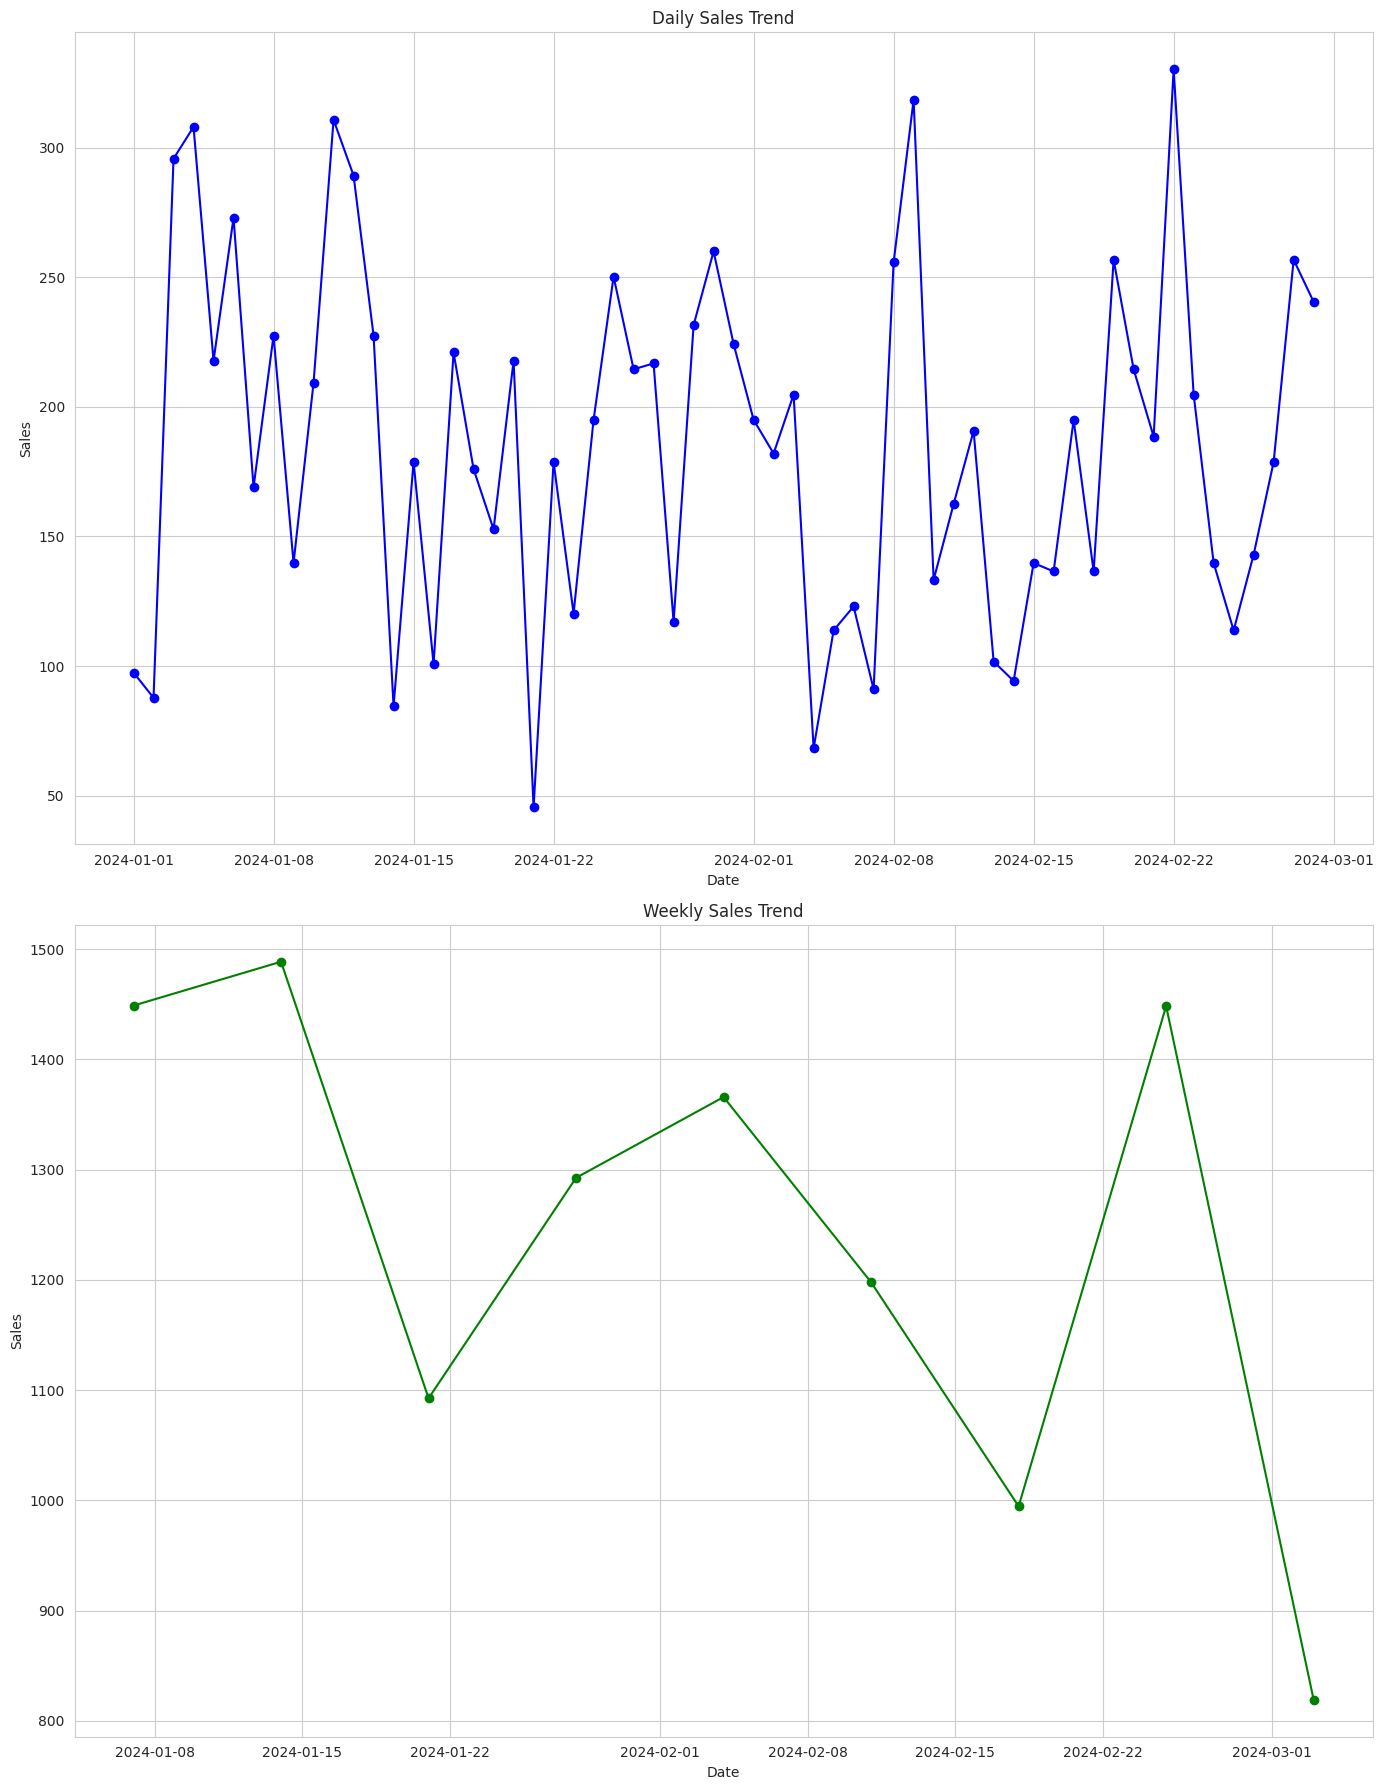

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Examining trends over time: Daily, Weekly, Monthly sales trends

# Aggregating sales data
daily_sales = merged_df.resample('D', on='Date').sales.sum()
weekly_sales = merged_df.resample('W', on='Date').sales.sum()
monthly_sales = merged_df.resample('M', on='Date').sales.sum()

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(14, 18))

# Daily Sales Trend
axes[0].plot(daily_sales.index, daily_sales.values, color='blue', marker='o', linestyle='-')
axes[0].set_title('Daily Sales Trend')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sales')

# Weekly Sales Trend
axes[1].plot(weekly_sales.index, weekly_sales.values, color='green', marker='o', linestyle='-')
axes[1].set_title('Weekly Sales Trend')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Sales')


plt.tight_layout()
plt.show()


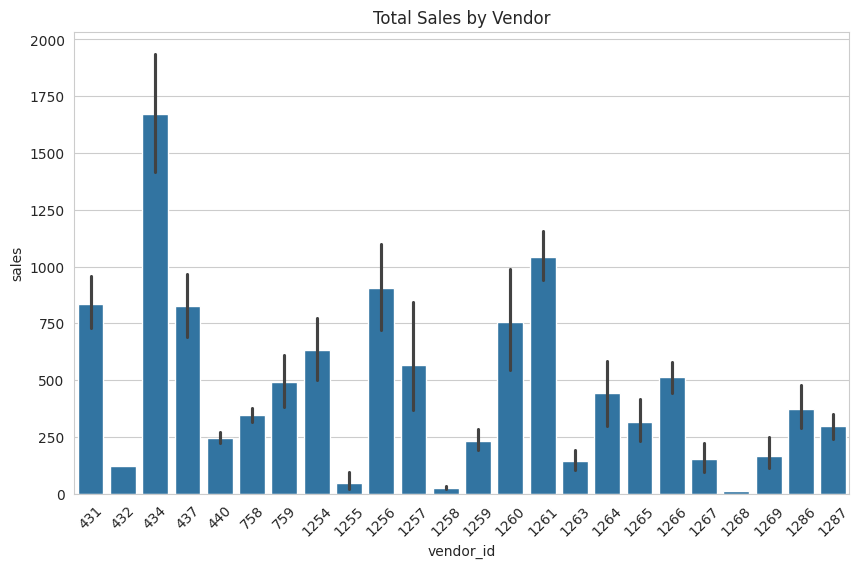

In [13]:
# Distribution Analysis: Sales by Vendor
plt.figure(figsize=(10, 6))
sns.barplot(x='vendor_id', y='sales', data=merged_df, estimator=sum)
plt.title('Total Sales by Vendor')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Convert 'Date' column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True)

# Aggregate sales over time to examine trends
sales_time_trends = merged_df.set_index('Date')['sales'].resample('M').sum()

# Distribution of sales across vendors
sales_by_vendor = merged_df.groupby('vendor_id')['sales'].sum().sort_values(ascending=False)

# Distribution of sales across categories
sales_by_category = merged_df.groupby('category_id')['sales'].sum().sort_values(ascending=False)

sales_time_trends, sales_by_vendor.head(), sales_by_category.head()


(Date
 2024-01-31    6038.0
 2024-02-29    5109.5
 Freq: M, Name: sales, dtype: float64,
 vendor_id
 434     1670.50
 1261    1043.25
 1256     903.50
 431      835.25
 437      825.50
 Name: sales, dtype: float64,
 category_id
 871    9678.50
 846     950.00
 843     139.75
 834     138.75
 864     104.00
 Name: sales, dtype: float64)

In [15]:

# Overview of sales by different dimensions
# Sales by Category Level
sales_by_category_level = merged_df.groupby(['Level1', 'Level2', 'Level3'])['sales'].sum().reset_index()
sales_by_category_level.head()

,Level1,Level2,Level3,sales
0,16.0,32.0,811.0,39.00
1,34.0,106.0,827.0,87.75
2,34.0,106.0,833.0,138.75
3,35.0,107.0,840.0,139.75
4,36.0,108.0,843.0,950.00


In [16]:

# Sales by Vendor County and Status
sales_by_vendor = merged_df.groupby(['county', 'status'])['sales'].sum().reset_index()
sales_by_vendor.head()

,county,status,sales
0,Cork,Active,9.75
1,Dublin,Active,6332.00
2,Galway,Active,670.50
3,Kerry,Active,243.75
4,Kildare,Active,1033.50


In [17]:
# Sales by Customer Membership and Status
sales_by_customer_membership = merged_df.groupby(['customer_membership', 'customer_status'])['sales'].sum().reset_index()
sales_by_customer_membership.head()

,customer_membership,customer_status,sales
0,Ad-hoc,Active,3416.75
1,FoodCloud Allocation L,Active,9.75
2,FoodCloud Allocation M,Active,939.25
3,FoodCloud Allocation XL,Active,448.50
4,FoodCloud Choice M,Active,172.25


In [18]:

# Top 5 sales transactions
top_sales_transactions = merged_df.nlargest(5, 'sales')
top_sales_transactions[['transaction_id', 'Date', 'sales', 'county', 'customer_status', 'customer_membership']]


,transaction_id,Date,sales,county,customer_status,customer_membership
526,37EFE9CB-DA07-4A97-8A66-EF7F159DA60A,2024-01-03,110.5,Kildare,Active,FoodCloud Retail
140,ABE39535-FFE5-4E18-B408-A0CE0E696DB7,2024-01-30,91.0,Dublin,Active,Unknown
375,74BA86CE-BCE5-4319-A698-91B8F050D197,2024-01-08,91.0,Laois,Active,Ad-hoc
490,E55335B5-D16B-4DE7-A427-36ED6153CC59,2024-01-11,71.5,Laois,Active,FoodCloud Allocation M
524,83EF7406-5C37-4115-B255-20A1C9D995AF,2024-01-12,71.5,Kildare,Active,FoodCloud Retail


Sales by Category Level

Sales data aggregated by category levels (Level1, Level2, Level3) shows variation in sales across different category hierarchies. For instance, categories at Level 36, Level 108, and Level 843 generated 950.00 in sales, indicating specific category paths that are more popular among customers.

Sales by Vendor County and Status

When analyzing sales by vendor county and status, Dublin stands out with a total of 6332.00 in sales, significantly higher than other counties, reflecting its central role in the sales distribution network.
Other counties like Kildare and Galway also contribute to sales but to a much lesser extent (1033.50 and 670.50 respectively).

Sales by Customer Membership and Status

Sales distribution across different types of customer memberships shows that "Ad-hoc" members, presumably casual or non-regular customers, lead in sales volume with 3416.75. This suggests a broad base of casual customers contributing significantly to sales.
Memberships like "FoodCloud Allocation M" and "FoodCloud Allocation XL" also contribute notable amounts (939.25 and 448.50 respectively), indicating the importance of these customer segments.

Top 5 Sales Transactions

The top sales transactions reveal individual purchases that significantly exceed the average, with the highest single transaction at 110.5. These transactions are spread across different counties (Dublin, Kildare, Laois) and customer statuses, indicating high-value sales are not confined to a specific location or customer type.


In [19]:
# Sales by Customer Membership and Status
sales_by_customer_index= merged_df.groupby(['customer_index'])['sales'].sum().reset_index()
sales_by_customer_index.head()

,customer_index,sales
0,510.0,97.50
1,526.0,9.75
2,528.0,149.50
3,611.0,429.00
4,622.0,84.50


In [20]:
# Analyzing sales in relation to customer preferred categories

from collections import Counter

# Combine all customer preferred categories into a single list
all_preferred_categories = merged_df['customer_preferred_categories'].dropna().str.split(', ').sum()

# Count the occurrence of each category in the preferences
category_preferences_count = Counter(all_preferred_categories)

# Convert the counter to a DataFrame for better visualization
category_preferences_df = pd.DataFrame(category_preferences_count.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

# Analyzing sales data for the top 5 preferred categories
top_5_preferred_categories = category_preferences_df.head(5)['Category']

# Filter sales data to include only transactions in the top 5 preferred categories
sales_top_preferred_categories = merged_df[merged_df['category_system_id'].isin(top_5_preferred_categories)]

# Summarize sales for these categories
sales_summary_top_preferred = sales_top_preferred_categories.groupby('category_system_id')['sales'].sum().reset_index()

category_preferences_df.head(), sales_summary_top_preferred


(           Category  Count
 0     Not Specified    510
 9         Preserves    201
 1         Breakfast    201
 11  RicePastaPulses    192
 16       Vegetables    192,
   category_system_id    sales
 0      Not Specified  11147.5)

In [21]:
category_preferences_df.head(25)

,Category,Count
0,Not Specified,510
9,Preserves,201
1,Breakfast,201
11,RicePastaPulses,192
16,Vegetables,192
15,Tinned,192
21,Fruit,187
6,Hot Drinks,182
19,Cooking Sauce,177
18,Condiments,177


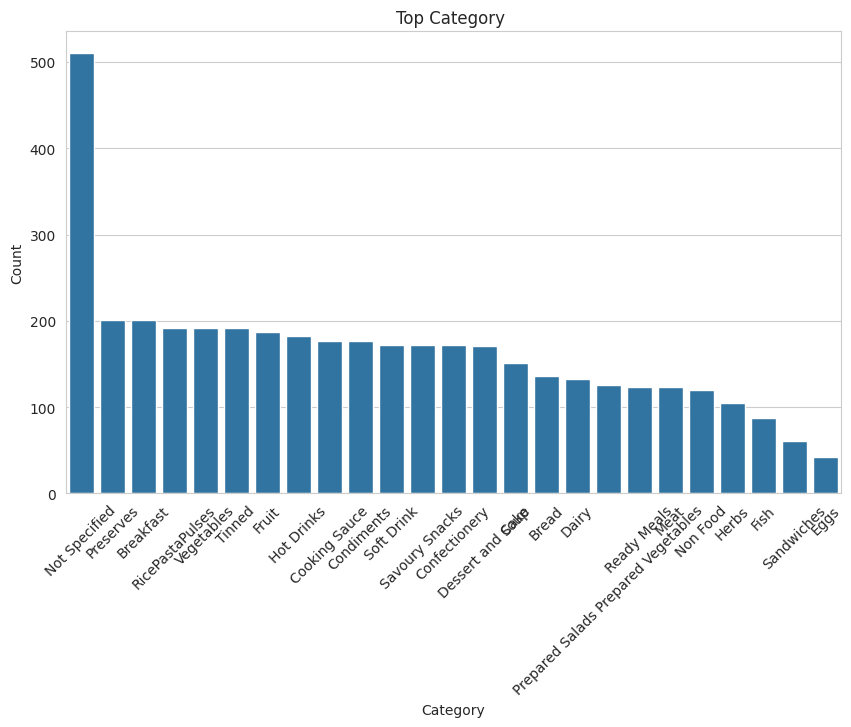

In [35]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=category_preferences_df, estimator=sum)
plt.title('Top Category ')
plt.xticks(rotation=45)
plt.show()


The most preferred categories among customers, based on the count of their mentions, are Breakfast and Preserves, each mentioned 201 times across customer preferences. These are closely followed by Vegetables, Tinned, and RicePastaPulses, each with 192 mentions.

However, when attempting to analyze sales data for these top 5 preferred categories, we encountered a discrepancy: the sales_top_preferred_categories DataFrame is empty. This suggests that the category_system_id from the sales data may not directly match the names of the preferred categories listed by customers, or there might be a data mapping or integration issue that prevents a straightforward comparison.

In [22]:
merged_df.columns

Index(['transaction_id', 'Date', 'category_id', 'vendor_id', 'customer_id',
       'sales', 'customer_index', 'customer_latitude', 'customer_logitude',
       'customer_status', 'customer_membership',
       'customer_preferred_categories', 'city', 'state', 'country_x', 'county',
       'status', 'vendor_country', 'current_status', 'category_system_id',
       'Level3', 'Level2', 'Level1'],
      dtype='object')

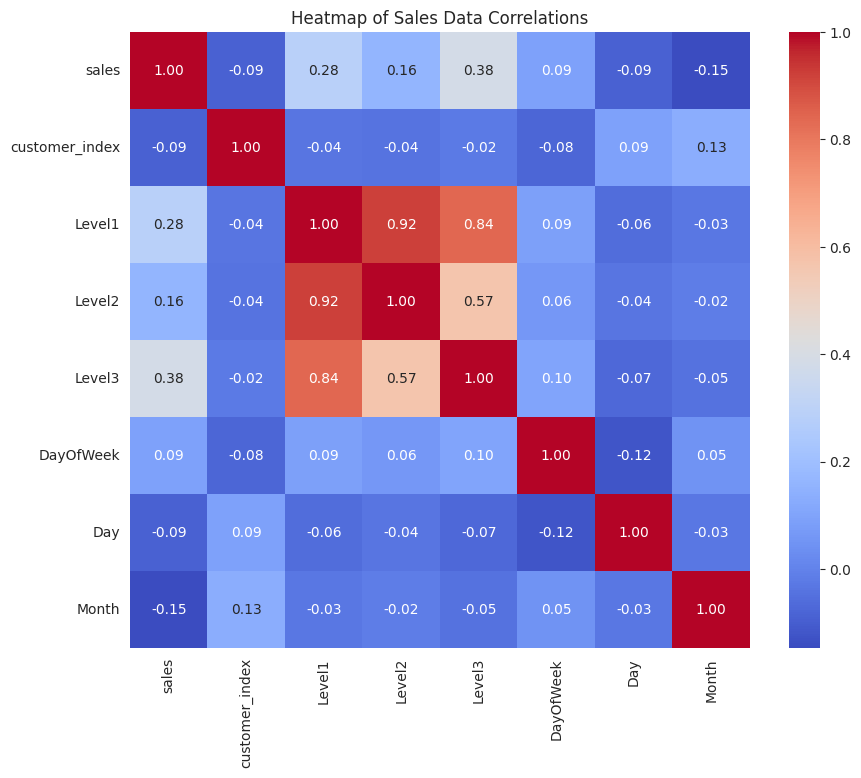

In [36]:
# Adding day of the week and month as features
merged_df['DayOfWeek'] = merged_df['Date'].dt.dayofweek
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['Month'] = merged_df['Date'].dt.month

# For this analysis, we'll focus on a subset of numeric columns.
heatmap_data = merged_df[['sales','customer_index', 'Level1', 'Level2', 'Level3', 'DayOfWeek','Day','Month']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plotting the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Sales Data Correlations")
plt.show()


In [24]:
# Examining sales by customer status to identify patterns based on customer activity or membership status.
sales_by_customer_status = merged_df.groupby('customer_status')['sales'].sum().reset_index()
sales_by_customer_status

,customer_status,sales
0,Active,11030.5


### Sales and days/months

<ipython-input-26-17571dac535d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='sales', data=merged_df, palette='viridis')


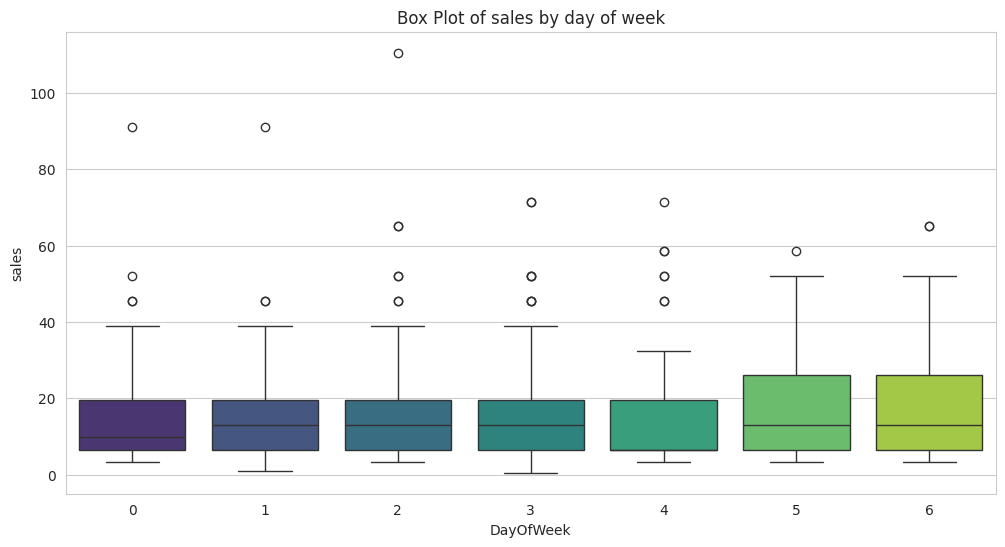

In [26]:
# Box plot


# Adding day of the week and month as features
merged_df['DayOfWeek'] = merged_df['Date'].dt.dayofweek

plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='sales', data=merged_df, palette='viridis')
plt.xlabel('DayOfWeek')
plt.ylabel('sales')
plt.title('Box Plot of sales by day of week')
plt.show()

<ipython-input-28-09567b5723e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Month', y='sales', data=merged_df, palette='Set2')


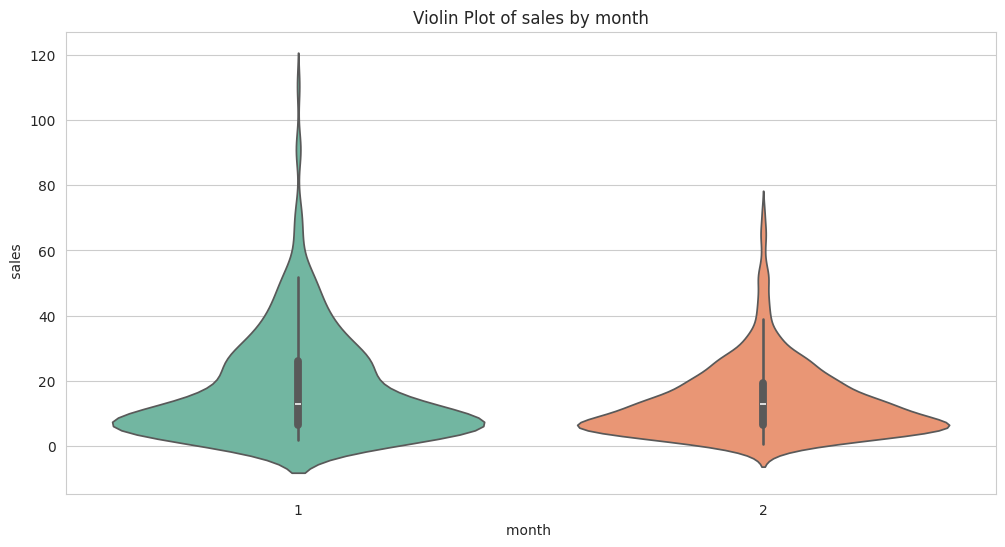

In [28]:
merged_df['Month'] = merged_df['Date'].dt.month
# Violin plot for Actual Wind Energy Generation by weekday
plt.figure(figsize=(12, 6))
sns.violinplot(x='Month', y='sales', data=merged_df, palette='Set2')
plt.xlabel('month ')
plt.ylabel(' sales')
plt.title('Violin Plot of sales by month')
plt.show()

### geo_data

In [30]:
# Analyzing sales by vendor county to see if there are geographical trends.
sales_by_county = merged_df.groupby('county')['sales'].sum().sort_values(ascending=False).reset_index()
sales_by_county

,county,sales
0,Dublin,6332.00
1,Laois,1670.50
2,Kildare,1033.50
3,Galway,670.50
4,Louth,633.75
5,Kerry,243.75
6,Mayo,234.00
7,Meath,165.75
8,Tipperary,154.00
9,Cork,9.75


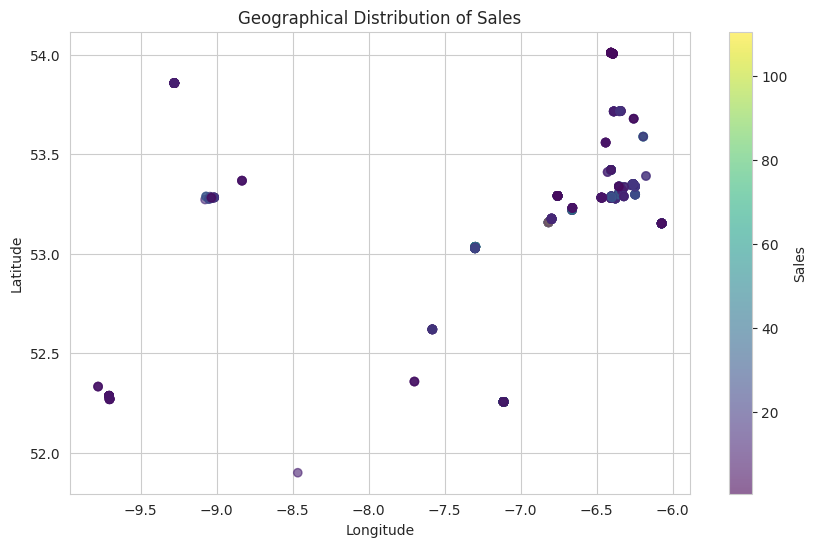

In [31]:
import matplotlib.pyplot as plt

# Filtering the data to include only entries with non-null latitude and longitude
geo_data = merged_df.dropna(subset=['customer_latitude', 'customer_logitude'])

# Plotting the geographical distribution of sales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(geo_data['customer_logitude'], geo_data['customer_latitude'], c=geo_data['sales'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Sales')
plt.title('Geographical Distribution of Sales')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [32]:
!pip3 install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


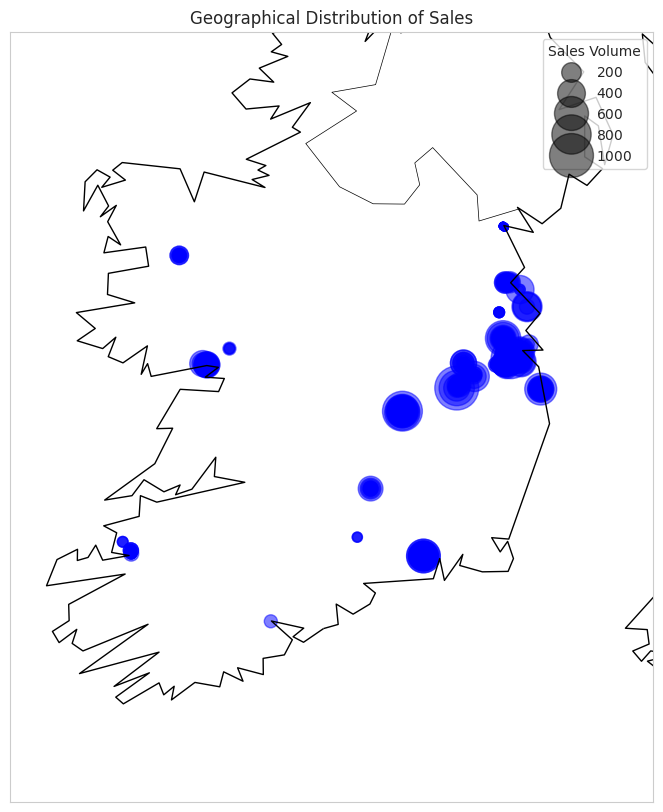

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Filter out entries without latitude or longitude
map_data = merged_df.dropna(subset=['customer_latitude', 'customer_logitude'])

# Setting up a basic map centered around the mean coordinates
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=map_data['customer_latitude'].min() - 1,
            urcrnrlat=map_data['customer_latitude'].max() + 1,
            llcrnrlon=map_data['customer_logitude'].min() - 1,
            urcrnrlon=map_data['customer_logitude'].max() + 1,
            resolution='l')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert longitude and latitude to x and y coordinates
x, y = m(map_data['customer_logitude'].values, map_data['customer_latitude'].values)

# Plotting each customer location with sales as bubble size (scaled down for visualization purposes)
scatter = m.scatter(x, y, s=map_data['sales'] / map_data['sales'].max() * 1000, alpha=0.5, color='blue', label='Sales Volume')

plt.title('Geographical Distribution of Sales')
plt.legend(*scatter.legend_elements("sizes", num=6), title="Sales Volume")
plt.show()


Where I discover how to do this

https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

https://www.youtube.com/watch?app=desktop&v=5G-1k4CNChI&ab_channel=101touchapps

https://stackoverflow.com/questions/40374441/python-basemap-module-impossible-to-import

## ML/Time series models

### SARIMA

In [ ]:
# To fit a SARIMA model, we first need to prepare the daily sales data and ensure it's in a suitable format.

# Aggregating sales data by date to get daily sales
daily_sales_data = merged_df.groupby('Date')['sales'].sum().reset_index()

# Setting the date as the index
daily_sales_data.set_index('Date', inplace=True)

# Ensuring the data is daily and fills any missing dates with sales of 0 (assuming no sales on missing dates)
daily_sales_series = daily_sales_data['sales'].asfreq('D', fill_value=0)

# Checking the first few entries to ensure correct setup
daily_sales_series.head()


Date
2024-01-01     97.50
2024-01-02     87.75
2024-01-03    295.75
2024-01-04    308.00
2024-01-05    217.75
Freq: D, Name: sales, dtype: float64

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Order: (p,d,q) where p = autoregressive order, d = differencing order, q = moving average order.
# Seasonal Order: (P,D,Q,s) where P = seasonal autoregressive order, D = seasonal differencing order, Q = seasonal moving average order, s = length of season.
model = SARIMAX(daily_sales_series,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fitting the model
sarima_result = model.fit(disp=False)

# Summary of the model's findings
sarima_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -240.386
Date:                           Thu, 11 Apr 2024   AIC                            490.771
Time:                                   09:27:52   BIC                            499.577
Sample:                               01-01-2024   HQIC                           494.019
                                    - 02-29-2024                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3400      0.177      1.926      0.054      -0.006       0.686
ma.L1         -1.0000    392.908     -0.003      0.998    -771.085     769.085
ar.S.L7       -0.2721      0.257     -1.058      0.290      -0.776       0.232
ma.S.L7       -0.6112      0.256     -2.392      0.017      -1.112      -0.110
sigma2      3662.1297   1.44e+06      0.003      0.998   -2.82e+06    2.82e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.67   Prob(JB):                         0.72
Heteroskedasticity (H):               1.16   Skew:                             0.07
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model used is SARIMAX(1, 1, 1)x(1, 1, 1, 7), indicating an autoregressive term, a differencing term, and a moving average term both in the non-seasonal and seasonal components, with a weekly seasonality considered (7 days).

The P>|z| values (p-values) for the coefficients indicate the significance of each parameter. Most of the model parameters have p-values suggesting varying degrees of significance, with the moving average parameter in the seasonal component (ma.S.L7) being statistically significant (p < 0.05).

The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values are 490.771 and 499.577, respectively. These metrics are useful for model comparison, with lower values indicating a better fit relative to the complexity of the model.

The Log Likelihood is -240.386, representing the log likelihood of the fitted model. This is another indicator of model fit, with higher values generally indicating a better fit.

The model diagnostics like Ljung-Box test and Jarque-Bera test suggest that residuals are behaving relatively well, indicating a decent model fit. However, the warning about the covariance matrix and the extremely large standard error for the moving average term (ma.L1) suggest there might be issues with the model stability or data sparsity.

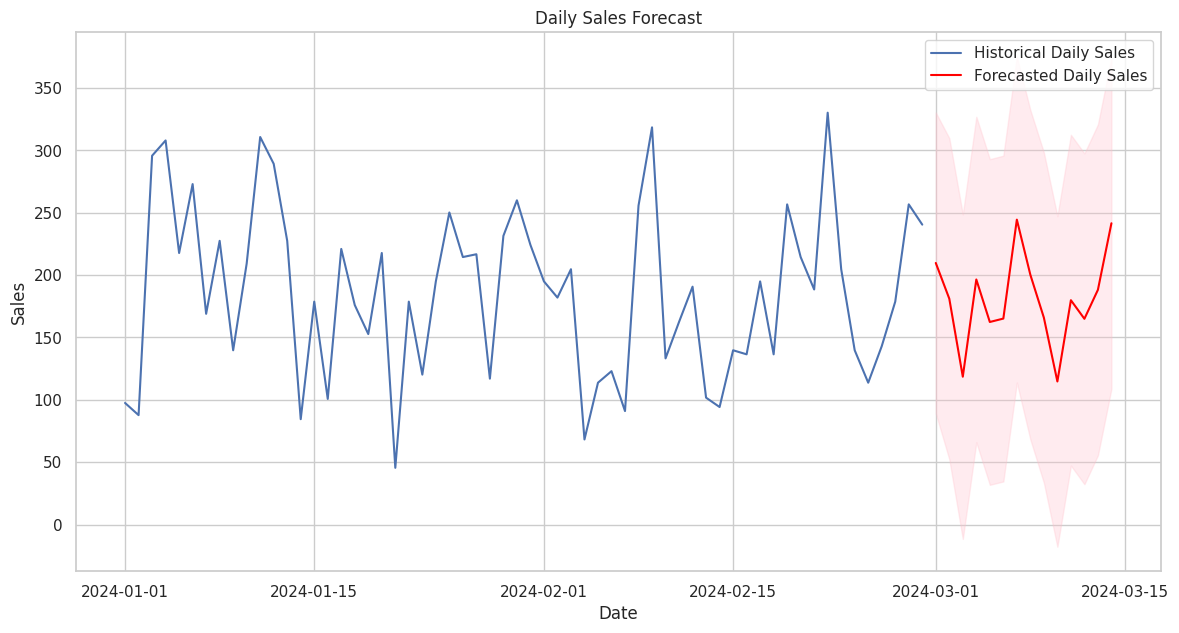

(2024-03-01    209.767231
 2024-03-02    181.110720
 2024-03-03    118.572983
 2024-03-04    196.521294
 2024-03-05    162.433829
 2024-03-06    165.163768
 2024-03-07    244.504495
 2024-03-08    200.268722
 2024-03-09    165.899104
 2024-03-10    114.723609
 2024-03-11    179.903252
 2024-03-12    164.983520
 2024-03-13    188.251146
 2024-03-14    241.599454
 Freq: D, Name: predicted_mean, dtype: float64,
             lower sales  upper sales
 2024-03-01    89.109176   330.425287
 2024-03-02    52.378072   309.843367
 2024-03-03   -11.526498   248.672464
 2024-03-04    66.038525   327.004062
 2024-03-05    31.867283   293.000375
 2024-03-06    34.569964   295.757571
 2024-03-07   113.900464   375.108525
 2024-03-08    68.228692   332.308753
 2024-03-09    33.516554   298.281655
 2024-03-10   -17.786105   247.233323
 2024-03-11    47.289001   312.517502
 2024-03-12    32.360007   297.607033
 2024-03-13    55.623902   320.878390
 2024-03-14   108.969972   374.228935)

In [ ]:
# Forecasting the next 30 days beyond the dataset using the fitted SARIMA model

forecast_days = 14  # Number of days to forecast

# Generating the forecast
forecast = sarima_result.get_forecast(steps=forecast_days)
forecast_index = pd.date_range(start=daily_sales_series.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='D')

# Extracting forecast mean
forecast_mean = forecast.predicted_mean

# Extracting confidence intervals
confidence_intervals = forecast.conf_int()

# Plotting the forecast along with historical data and confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(daily_sales_series.index, daily_sales_series, label='Historical Daily Sales')
plt.plot(forecast_index, forecast_mean, label='Forecasted Daily Sales', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Daily Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

forecast_mean, confidence_intervals


### lr

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Adding day of the week and month as features
merged_df['DayOfWeek'] = merged_df['Date'].dt.dayofweek
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['Month'] = merged_df['Date'].dt.month

# Including specified features plus creating additional necessary features for modeling
selected_columns = [
    'Date','Month', 'DayOfWeek','sales'  # Target variable
]
# Filter the dataset to include only the selected columns
data_filtered = merged_df[selected_columns]

# Generate lag features for ActualWindMW for 24 hours
for lag in range(1, 7):
    data_filtered[f'sales_lag{lag}'] = data_filtered['sales'].shift(lag)

# Adding rolling averages and differences for 'ActualWindMW'
data_filtered['rolling_sales'] = data_filtered['sales'].rolling(window=3).mean().shift(1)
data_filtered['diff_sales'] = data_filtered['sales'].diff().shift(1)

data_filtered.dropna(inplace=True)

data_filtered.head()


<ipython-input-37-a3a21a8e73bc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'sales_lag{lag}'] = data_filtered['sales'].shift(lag)
<ipython-input-37-a3a21a8e73bc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'sales_lag{lag}'] = data_filtered['sales'].shift(lag)
<ipython-input-37-a3a21a8e73bc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Date,Month,DayOfWeek,sales,sales_lag1,sales_lag2,sales_lag3,sales_lag4,sales_lag5,sales_lag6,rolling_sales,diff_sales
6,2024-02-24,2,5,3.25,6.50,6.50,6.50,6.50,6.5,13.0,6.500000,0.00
7,2024-02-23,2,4,6.50,3.25,6.50,6.50,6.50,6.5,6.5,5.416667,-3.25
8,2024-02-22,2,3,6.50,6.50,3.25,6.50,6.50,6.5,6.5,5.416667,3.25
9,2024-01-22,1,0,6.50,6.50,6.50,3.25,6.50,6.5,6.5,5.416667,0.00
10,2024-02-19,2,0,3.25,6.50,6.50,6.50,3.25,6.5,6.5,6.500000,0.00


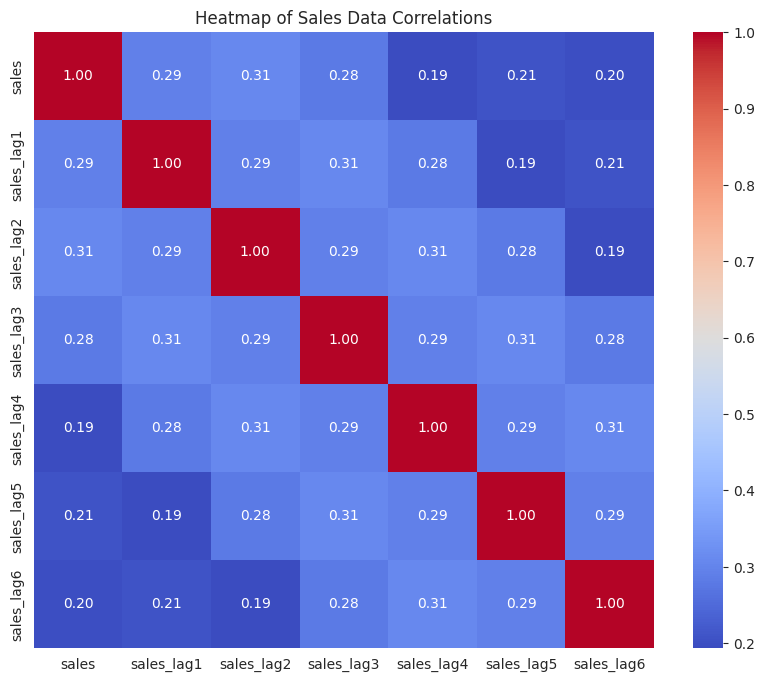

In [39]:


# For this analysis, we'll focus on a subset of numeric columns.
heatmap_data = data_filtered[['sales','sales_lag1','sales_lag2','sales_lag3','sales_lag4','sales_lag5','sales_lag6']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plotting the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Sales Data Correlations")
plt.show()

In [ ]:


# Splitting the dataset into training and testing sets
# We reserve the last 7 observations for testing to simulate forecasting the next 7 hours It's good practice to reserve the last 7 observations for testing
training_data = data_filtered.iloc[:-7]
testing_data = data_filtered.iloc[-7:]

# Exclude target variable and non-numeric 'DayTime'
X_train = training_data.drop(['sales','Date'], axis=1)
y_train = training_data['sales']

X_test = testing_data.drop(['sales','Date'], axis=1)
y_test = testing_data['sales']


In [ ]:

# Step 5: Model Selection
from sklearn.linear_model import LinearRegression
# Step 6: Model Training
model = LinearRegression()
model.fit(X_train , y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10.116612985130496


In [ ]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ... (Previous code remains unchanged)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


cv = np.std(y_test) / np.mean(y_test)
print(f'Coefficient of Variation: {cv}')

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {evs}')

R-squared: -2.910958866046503
Coefficient of Variation: 0.31491832864888686
Explained Variance Score: -0.7640655176105398


In [ ]:

import numpy as np

# Assuming y_true and y_pred are your arrays of actual and predicted values
y_true = np.array(y_test)    # Your actual values


# Calculate MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAPE: {mape}%")

MAPE: 66.77650302926779%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


predictions_index = data_filtered.index[-7:]  # This gives you the index for predictions

# Create a DataFrame for predictions with the correct future index

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(y_pred, index=predictions_index, columns=['Predicted'])

# Create a DataFrame for actuals
actuals_df = pd.DataFrame(data_filtered['sales'].iloc[-7:].values, index=data_filtered.index[-7:], columns=['sales'])

# Combine the two DataFrames
combined_df = pd.concat([predictions_df, actuals_df], axis=1)
combined_df


,Predicted,sales
705,9.025197,3.25
706,6.618982,3.25
707,6.209043,6.50
708,9.703680,6.50
709,6.377237,6.50
710,7.146212,6.50
711,7.165669,3.25


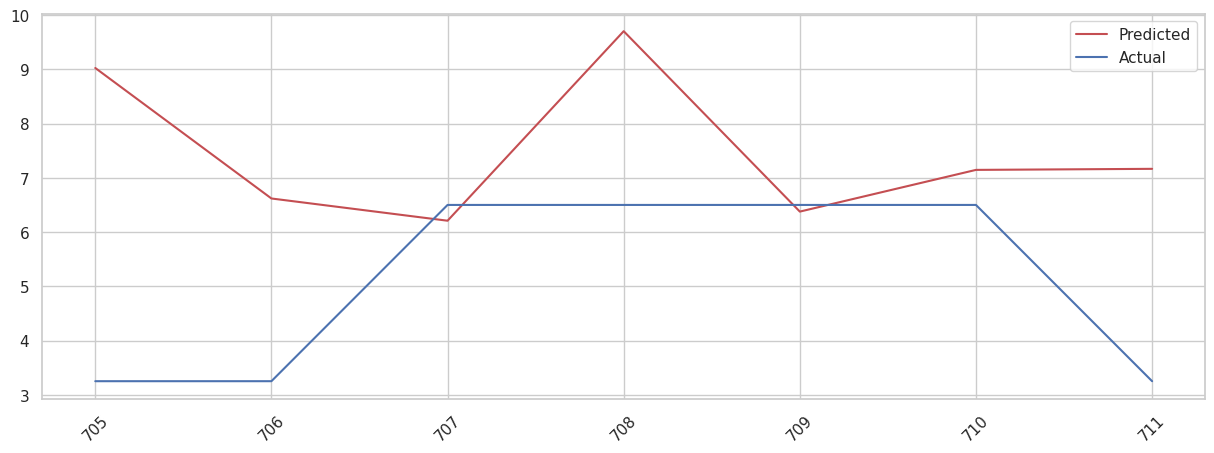

In [ ]:

# Now, plot the data
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['sales'], 'b-', label='Actual')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### RF

In [ ]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler


In [ ]:

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
data_filtered['Month'] = le.fit_transform(data_filtered['Month'])

# Splitting the dataset into training and testing sets
# We reserve the last 24 observations for testing to simulate forecasting the next 24 hours It's good practice to reserve the last 24 observations for testing
# We reserve the last 7 observations for testing to simulate forecasting the next 7 hours It's good practice to reserve the last 7 observations for testing
training_data = data_filtered.iloc[:-7]
testing_data = data_filtered.iloc[-7:]

# Exclude target variable and non-numeric 'DayTime'
X_train = training_data.drop(['sales','Date'], axis=1)
y_train = training_data['sales']

X_test = testing_data.drop(['sales','Date'], axis=1)
y_test = testing_data['sales']


# Splitting the dataset into training and testing sets again
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Since RandomForest does not need feature scaling, we'll create a simple
# But you can add preprocessing steps here if needed.
pipeline = Pipeline([
    ('rf', RandomForestRegressor(random_state=42))
])

# Hyperparameter grid for RandomForestRegressor (add ranseach)
param_grid = {
    'rf__n_estimators': [50],  # Smaller range
    'rf__max_depth': [2],  # Added a mid-point for diversity
    'rf__min_samples_split': [2],
    'rf__min_samples_leaf': [2],
    'rf__max_features': ['sqrt']
}


# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


# Save the best model
model_filename = 'rf_model_optimized.joblib'
joblib.dump(best_model, model_filename)
print(f'Model saved as {model_filename}')

# Predicting with the best model
predictions = best_model.predict(X_test)

# Calculate metrics
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")


<ipython-input-167-02c5d526d1d5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Month'] = le.fit_transform(data_filtered['Month'])


Best parameters: {'rf__max_depth': 2, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Model saved as rf_model_optimized.joblib
MAE: 3.162929118635419, MSE: 12.34243039327977, RMSE: 3.513179527618788, R^2: -3.7714326569681162


In [ ]:

import numpy as np

# Assuming y_true and y_pred are your arrays of actual and predicted values
y_true = np.array(y_test)    # Your actual values
predictions = predictions.flatten()  # Your predictions

# Calculate MAPE
mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100

print(f"MAPE: {mape}%")


MAPE: 81.04286027262945%


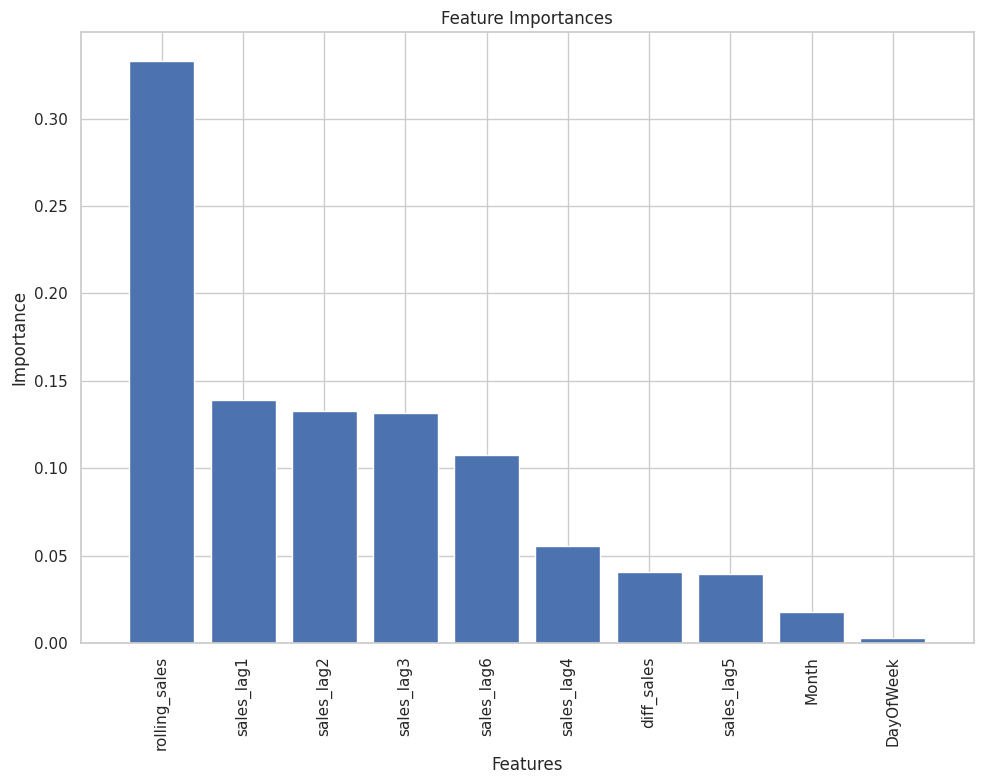

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is your features DataFrame and best_model is your trained model
feature_names = X_train.columns

# Retrieving feature importances
feature_importances = best_model.named_steps['rf'].feature_importances_

# Sorting the features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Visualizing the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


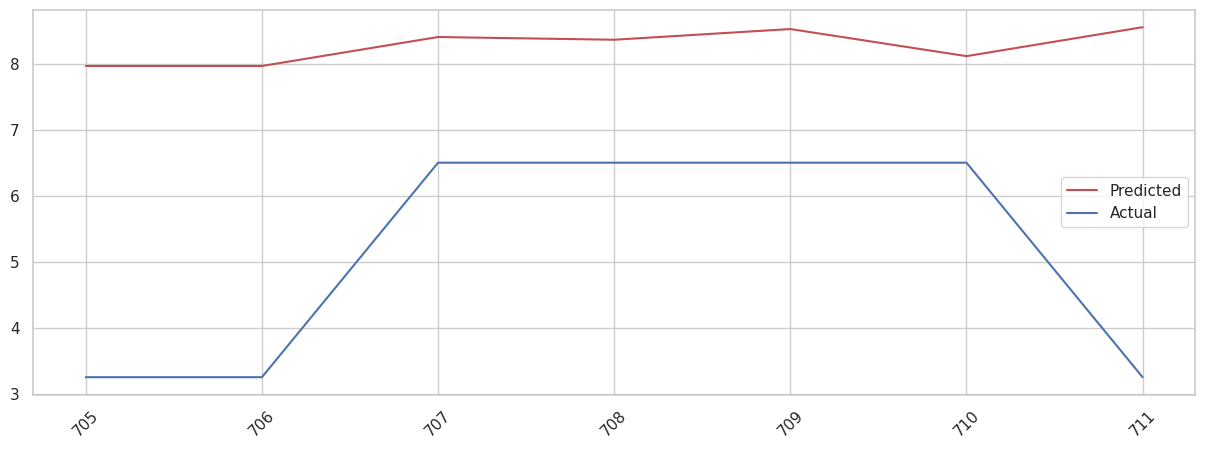

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


predictions_index = data_filtered.index[-7:]  # This gives you the index for predictions

# Create a DataFrame for predictions with the correct future index

# Create a DataFrame for predictions with the correct future index
predictions_df = pd.DataFrame(predictions, index=predictions_index, columns=['Predicted'])

# Create a DataFrame for actuals
actuals_df = pd.DataFrame(data_filtered['sales'].iloc[-7:].values, index=data_filtered.index[-7:], columns=['Actual'])


# Combine the two DataFrames
combined_df = pd.concat([predictions_df, actuals_df], axis=1)
# Now, plot the data
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df['Predicted'], 'r-', label='Predicted')
plt.plot(combined_df.index, combined_df['Actual'], 'b-', label='Actual')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()